# Classify IMDB Movie Reviews using a 1D ConvNet in Deep Learning
##### I build a 1D Convolutional nerual network using Keras to classify English movie reviews (from the IMDB dataset) based on their sentiment, into two classes - Positive and Negative 

##Import the IMDB dataset from Keras
##### The IMDB dataset comes inbuilt in the Keras framework

In [1]:
# Import the dataset from keras.datasets module 
from keras.datasets import imdb

# Limit the maximum size of the vocabulary to VOCAB_SIZE
# Only top VOCAB_SIZE most frequently occurring words in the dataset will be considered
# Discarding rarely words would help keep a manageable size
# Words in the training set which are not among the top VOCAB_SIZE most frequent words, will be marked by the 'out of vocabulary' character.
# Words occurring in the test set (but not in the training set) which are not among the top VOCAB_SIZE most frequent words are skipped.
VOCAB_SIZE = 20000
# Skip the most frequently occurring SKIP_COUNT
# These words are often articles/determiner/prepositions (Eg. a, the, an etc) and hence not helpful classifying the reviews
SKIP_COUNT = 0
# Filter out sentences which are longer than MAX_LENGTH
MAX_LENGTH = None

print("Loading the IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE, skip_top=SKIP_COUNT, maxlen=MAX_LENGTH)
print("Dataset loaded!")

Using TensorFlow backend.


Loading the IMDB dataset...
17465344/17464789 [==============================] - 2s 0us/step
Dataset loaded!


In [3]:
print("Size of training set :", len(train_data))
print("Size of test set     :", len(test_data))

Size of training set : 25000
Size of test set     : 25000


In [2]:
print("Sample training example:")
print(train_data[3])
print("Label:")
print(train_labels[3])

Sample training example:
[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 15305, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 18435, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 7

In [4]:
# Get the mapping from each word in vocabulary to its index
word_to_index = imdb.get_word_index()

index_to_word = dict ( [(idx, word) for (word, idx) in word_to_index.items()] )


# Check the review in English too
english_review = ' '.join ( [index_to_word.get(idx-3, '?') for idx in train_data[3]] )
# NOTE: In the dataset, 
#       index 0 is reserved for "padding",
#       index 1 is reserved for "start of sequence"
#       index 2 is reserved for "unknown"
#
# However, this is not followed in the word-to-index mapping obtained from imdb.get_word_index()
# In the mapping, index 0 is for None, and thereafter, index i maps to the word at index i-3 (i.e. "padding", "start of sequence" and "unknown" are skipped in the mapping)
# Hence the change in the above line of code 

print("Earlier training example in English:")
print(english_review)

1646592/1641221 [==============================] - 1s 1us/step
Earlier training example in English:
? the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with ? role m

In [5]:
# Since vocabulary size is restricted to VOCAB_SIZE, no word index should be greater than VOCAB_SIZE
max_index = max ( [max(review) for review in train_data] )

print("VOCAB_SIZE          =", VOCAB_SIZE)
print("Max index of a word =", max_index)

VOCAB_SIZE          = 20000
Max index of a word = 19999


## Prepare the dataset 
##### Pad the integer sequences

In [6]:
# Find and store the length of the longest review in the dataset
max_train_length = max (len(review) for review in train_data)
max_test_length = max (len(review) for review in test_data)

max_length = max(max_train_length, max_test_length)
print("Maximum length of a review in dataset:", max_length)

Maximum length of a review in dataset: 2494


In [7]:
from keras.preprocessing.sequence import pad_sequences

# Pad each review in the dataset till their length = max_length
print("Padding the reviews...")
train_data = pad_sequences (train_data, maxlen=max_length)
test_data = pad_sequences (test_data, maxlen=max_length)

print("Shape of train_data =", train_data.shape)
print("Shape of test_data  =", test_data.shape)

Padding the reviews...
Shape of train_data = (25000, 2494)
Shape of test_data  = (25000, 2494)


## Build the model
##### I build an 1D Convolutional neural architecure using Keras Sequential API

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, GlobalAveragePooling1D
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim = VOCAB_SIZE,
                    output_dim = 128,
                    input_length = max_length))
model.add(Conv1D(filters = 128,
                 kernel_size = 3,
                 strides = 1,
                 padding = 'valid',
                 activation = 'relu',
                ))
model.add(MaxPooling1D(pool_size = 7))
model.add(GlobalMaxPooling1D())
model.add(Dense(units = 32,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2494, 128)         2560000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2492, 128)         49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 356, 128)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,613,441
Trainable params: 2,613,441
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

## Train the model and tune the Hyperparameters

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN

callback_list = [
                 ModelCheckpoint(
                     filepath = '/content/drive/My Drive/Personal/Sentiment Analysis/best_CNNmodel.hdf5',
                     monitor = 'val_acc',
                     verbose = 1,
                     save_best_only = True,
                     save_weights_only = False,
                     mode = 'max',
                     period = 1
                 ),
                 
                 EarlyStopping(
                    monitor = 'val_acc',
                    patience = 20,
                    verbose = 1,
                    mode = 'max',
                    baseline = 0.5,
                    restore_best_weights = True
                 ),

                 ReduceLROnPlateau(
                     monitor = 'val_loss',
                     factor = 0.2,
                     patience = 5,
                     verbose = 1,
                     mode = 'min',
                     cooldown = 1,
                     min_lr = 0
                 ),

                 TerminateOnNaN()
]

In [16]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 100,
                    batch_size = 64,
                    verbose = 1,
                    callbacks = callback_list,
                    validation_split = 0.00512,
                    shuffle = True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24872 samples, validate on 128 samples
Epoch 1/100
24872/24872 [==============================] - 9s 377us/step - loss: 0.3959 - acc: 0.8106 - val_loss: 0.2992 - val_acc: 0.8828

Epoch 00001: val_acc improved from -inf to 0.88281, saving model to /content/drive/My Drive/Colab Notebooks/best_CNNmodel.hdf5
Epoch 2/100
24872/24872 [==============================] - 9s 373us/step - loss: 0.1661 - acc: 0.9386 - val_loss: 0.2718 - val_acc: 0.9141

Epoch 00002: val_acc improved from 0.88281 to 0.91406, saving model to /content/drive/My Drive/Colab Notebooks/best_CNNmodel.hdf5
Epoch 3/100
24872/24872 [==============================] - 9s 376us/step - loss: 0.0492 - acc: 0.9873 - val_loss: 0.2245 - val_acc: 0.9453

Epoch 00003: val_acc improved from 0.91406 to 0.94531, saving model to /content/drive/My Drive/Colab Notebooks/best_CNNmodel.hdf5
Epoch 4/100
24872/24872 [==============================] - 9s 371us/step - loss: 0.0078 - acc: 0.9994 - val_loss: 0.2604 - val_acc: 0.9219

Epoch

In [18]:
print("Best Validation Accuracy =", max(history.history['val_acc'])*100)
print("Best Training Accuracy =", max(history.history['acc'])*100)

Best Validation Accuracy = 94.53125
Best Training Accuracy = 100.0


## Plot the results

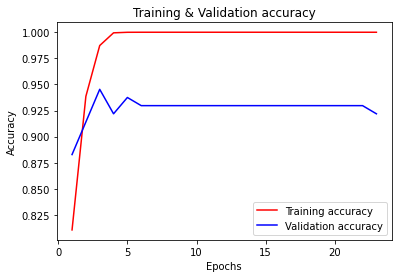

In [19]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

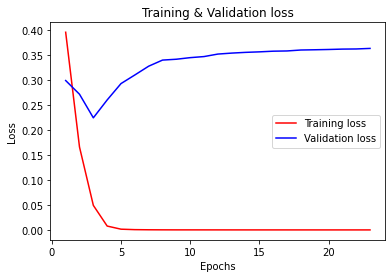

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test the final model

In [21]:
test_metrics = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 3s 125us/step


In [22]:
test_accuracy = test_metrics[1]
test_loss = test_metrics[0]

print("Test Accuracy :", test_accuracy)

Test Accuracy : 0.89683997631073
